# Model `BinaryMFPenalty`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


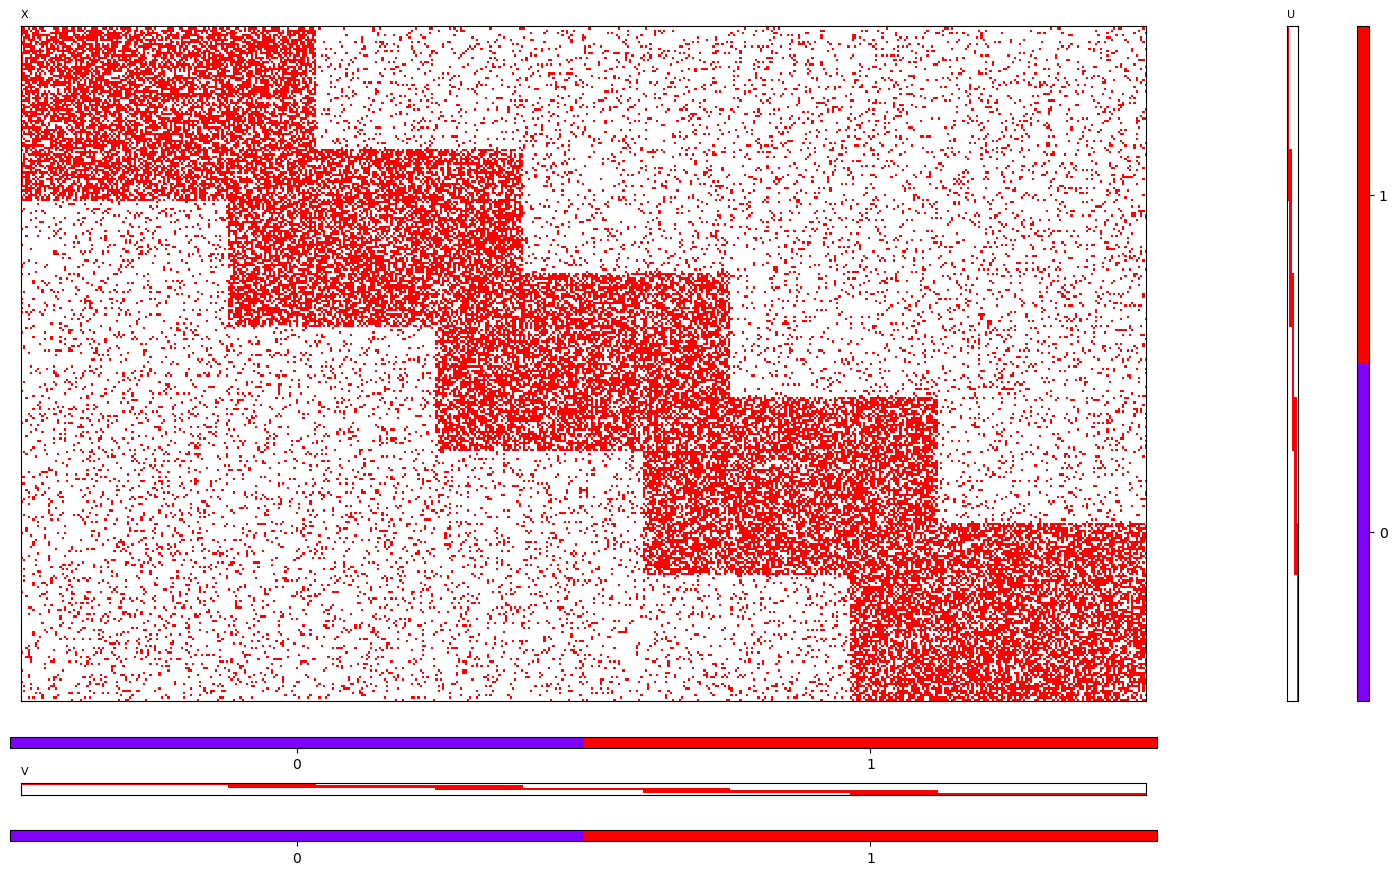

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
from datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721223113
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721223113


# 1.1 Init U, V with `NMFSklearn` / `WNMF`

Note that for multiplicative update, it's better to replace the zeros in init U, V with small values. 
Otherwise, these entries will not be updated.

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[W] Timer not started.
[I] model saved as: 24-07-17_21-31-57_NMFSklearn.pickle


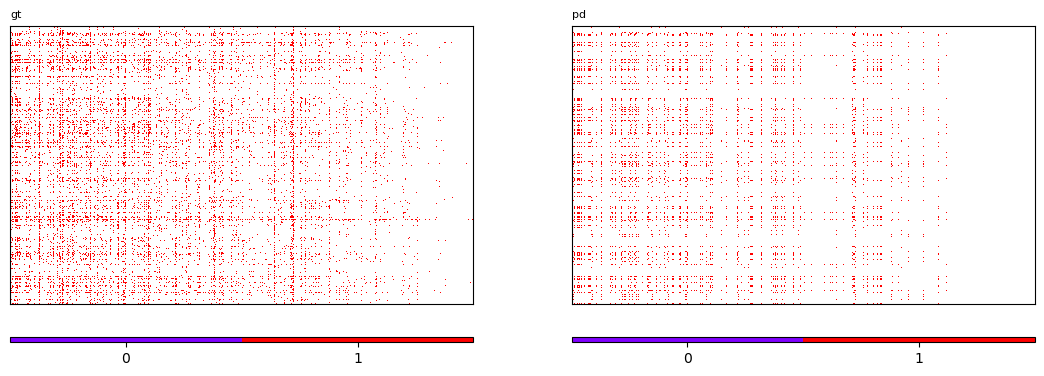

<Figure size 640x480 with 0 Axes>

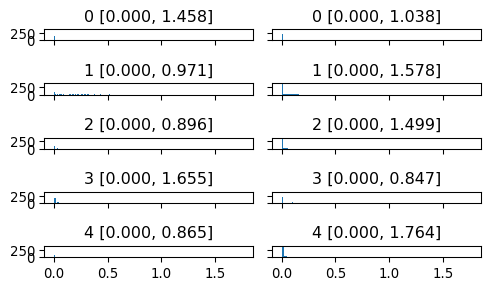

In [5]:
from models import NMFSklearn, WNMF
from utils import show_factor_distribution

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

d:\Dropbox\PyBMF\examples\..\models\BaseModel.py:53: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  self.init_model()


[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.02
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : uniform
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.1693], V: [0.0000, 0.1693]
[I] Normalized to  : U: [0.0000, 0.1692], V: [0.0000, 0.1692]


[I] error: 2.90e+03, rec_error: 2.71e+03, reg: 7.24e+00, reg_error: 1.97e+02: : 101it [00:07, 12.66it/s]                       


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-17_21-32-09_BinaryMFPenalty.pickle


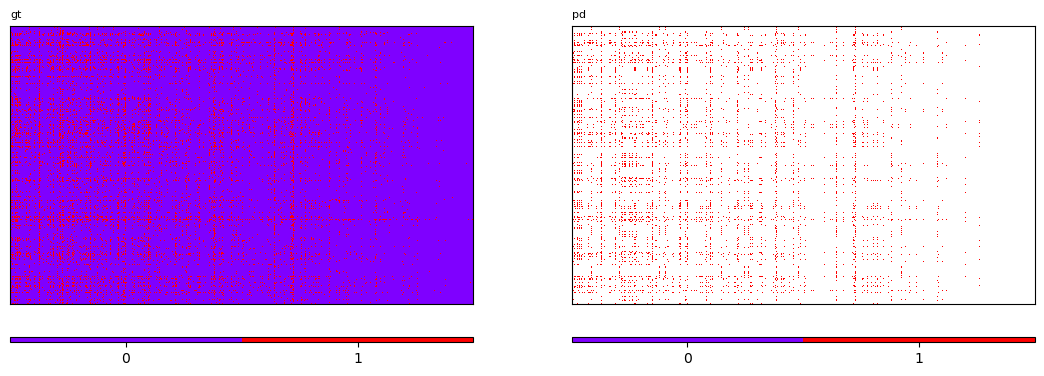

\
                                                                              
                  time iter        error    rec_error       reg   reg_error   
0    17/07/24 09:32:01    0  5039.897597  5010.456628  1.000000   29.440969   
1    17/07/24 09:32:01    1  3704.027831  3670.505775  1.000000   33.522056   
2    17/07/24 09:32:01    2  3620.998762  3584.953958  1.020000   36.044804   
3    17/07/24 09:32:01    3  3592.872739  3555.706170  1.040400   37.166569   
4    17/07/24 09:32:01    4  3559.081796  3520.821977  1.061208   38.259819   
5    17/07/24 09:32:01    5  3511.709777  3472.304196  1.082432   39.405581   
6    17/07/24 09:32:01    6  3446.288190  3405.723911  1.104081   40.564279   
7    17/07/24 09:32:02    7  3367.483087  3325.819470  1.126162   41.663617   
8    17/07/24 09:32:02    8  3290.286179  3247.544546  1.148686   42.741634   
9    17/07/24 09:32:02    9  3225.675322  3181.860872  1.171659   43.814451   
10   17/07/24 09:32:02   10  3174.501480  3129.687834  1.195093   44.813646   
11   17/07/24 09:32:02   11  3133.756692  3088.061710  1.218994   45.694983   
12   17/07/24 09:32:02   12  3100.612147  3054.163654  1.243374   46.448493   
13   17/07/24 09:32:02   13  3073.060083  3025.956767  1.268242   47.103315   
14   17/07/24 09:32:02   14  3049.701462  3001.993447  1.293607   47.708015   
15   17/07/24 09:32:02   15  3029.557976  2981.253358  1.319479   48.304618   
16   17/07/24 09:32:02   16  3011.854087  2962.931552  1.345868   48.922536   
17   17/07/24 09:32:02   17  2995.958164  2946.375243  1.372786   49.582921   
18   17/07/24 09:32:02   18  2981.406422  2931.106039  1.400241   50.300384   
19   17/07/24 09:32:02   19  2967.906941  2916.821980  1.428246   51.084961   
20   17/07/24 09:32:02   20  2955.316750  2903.375538  1.456811   51.941212   
21   17/07/24 09:32:02   21  2943.589928  2890.722318  1.485947   52.867610   
22   17/07/24 09:32:03   22  2932.721117  2878.862861  1.515666   53.858255   
23   17/07/24 09:32:03   23  2922.707114  2867.802498  1.545980   54.904616   
24   17/07/24 09:32:03   24  2913.530082  2857.533288  1.576899   55.996794   
25   17/07/24 09:32:03   25  2905.155184  2848.030908  1.608437   57.124276   
26   17/07/24 09:32:03   26  2897.530727  2839.254325  1.640606   58.276402   
27   17/07/24 09:32:03   27  2890.588749  2831.145513  1.673418   59.443235   
28   17/07/24 09:32:03   28  2884.252362  2823.635512  1.706886   60.616850   
29   17/07/24 09:32:03   29  2878.447493  2816.655670  1.741024   61.791822   
30   17/07/24 09:32:03   30  2873.107446  2810.142655  1.775845   62.964791   
31   17/07/24 09:32:03   31  2868.174966  2804.040698  1.811362   64.134268   
32   17/07/24 09:32:03   32  2863.606450  2798.306176  1.847589   65.300274   
33   17/07/24 09:32:03   33  2859.372321  2792.908546  1.884541   66.463774   
34   17/07/24 09:32:03   34  2855.453725  2787.827261  1.922231   67.626464   
35   17/07/24 09:32:04   35  2851.836896  2783.046221  1.960676   68.790675   
36   17/07/24 09:32:04   36  2848.505830  2778.546607  1.999890   69.959223   
37   17/07/24 09:32:04   37  2845.439084  2774.303701  2.039887   71.135383   
38   17/07/24 09:32:04   38  2842.614622  2770.291773  2.080685   72.322849   
39   17/07/24 09:32:04   39  2840.024943  2766.500576  2.122299   73.524367   
40   17/07/24 09:32:04   40  2837.656194  2762.915836  2.164745   74.740358   
41   17/07/24 09:32:04   41  2835.486477  2759.514188  2.208040   75.972289   
42   17/07/24 09:32:04   42  2833.496983  2756.275630  2.252200   77.221353   
43   17/07/24 09:32:04   43  2831.673005  2753.184698  2.297244   78.488308   
44   17/07/24 09:32:04   44  2830.005074  2750.231417  2.343189   79.773657   
45   17/07/24 09:32:04   45  2828.486918  2747.409247  2.390053   81.077671   
46   17/07/24 09:32:04   46  2827.115291  2744.714765  2.437854   82.400526   
47   17/07/24 09:32:04   47  2825.892422  2742.150368  2.486611   83.742054   
48   17/07/24 09:32:05   48  2824.821834  2739.7

train                              
                               0                              
                  time    Recall Precision  Accuracy        F1
0    17/07/24 09:32:01  0.000000  0.000000  0.928307  0.000000
1    17/07/24 09:32:01  0.004184  0.865385  0.928560  0.008329
2    17/07/24 09:32:01  0.007253  0.917647  0.928780  0.014392
3    17/07/24 09:32:01  0.008648  0.948980  0.928893  0.017140
4    17/07/24 09:32:01  0.012646  0.944444  0.929160  0.024959
5    17/07/24 09:32:01  0.018040  0.928230  0.929500  0.035392
6    17/07/24 09:32:01  0.024921  0.884488  0.929860  0.048476
7    17/07/24 09:32:02  0.042775  0.877863  0.930947  0.081575
8    17/07/24 09:32:02  0.067045  0.847239  0.932247  0.124257
9    17/07/24 09:32:02  0.090943  0.838046  0.933567  0.164080
10   17/07/24 09:32:02  0.108332  0.810153  0.934253  0.191109
11   17/07/24 09:32:02  0.123489  0.793309  0.934853  0.213711
12   17/07/24 09:32:02  0.134555  0.774625  0.935147  0.229282
13   17/07/24 09:32:02  0.147759  0.772860  0.935787  0.248087
14   17/07/24 09:32:02  0.164218  0.756641  0.936293  0.269866
15   17/07/24 09:32:02  0.168031  0.756067  0.936467  0.274954
16   17/07/24 09:32:02  0.178910  0.748930  0.936833  0.288824
17   17/07/24 09:32:02  0.184675  0.741045  0.936920  0.295668
18   17/07/24 09:32:02  0.196206  0.735192  0.937307  0.309748
19   17/07/24 09:32:02  0.198624  0.733516  0.937373  0.312601
20   17/07/24 09:32:02  0.195183  0.737267  0.937313  0.308654
21   17/07/24 09:32:02  0.199368  0.733995  0.937420  0.313565
22   17/07/24 09:32:03  0.205133  0.726853  0.937487  0.319965
23   17/07/24 09:32:03  0.210340  0.722222  0.937587  0.325796
24   17/07/24 09:32:03  0.210712  0.722116  0.937600  0.326231
25   17/07/24 09:32:03  0.213688  0.717676  0.937600  0.329321
26   17/07/24 09:32:03  0.217779  0.717964  0.937787  0.334189
27   17/07/24 09:32:03  0.225590  0.718815  0.938153  0.343407
28   17/07/24 09:32:03  0.230519  0.716888  0.938307  0.348860
29   17/07/24 09:32:03  0.233866  0.715912  0.938420  0.352562
30   17/07/24 09:32:03  0.236377  0.717674  0.938587  0.355624
31   17/07/24 09:32:03  0.235819  0.719433  0.938620  0.355207
32   17/07/24 09:32:03  0.242607  0.715775  0.938793  0.362386
33   17/07/24 09:32:03  0.243258  0.718287  0.938907  0.363434
34   17/07/24 09:32:03  0.241863  0.713189  0.938673  0.361225
35   17/07/24 09:32:04  0.243630  0.710798  0.938667  0.362881
36   17/07/24 09:32:04  0.244932  0.709208  0.938667  0.364114
37   17/07/24 09:32:04  0.248838  0.708874  0.938820  0.368367
38   17/07/24 09:32:04  0.252371  0.709172  0.938980  0.372265
39   17/07/24 09:32:04  0.252836  0.708811  0.938987  0.372721
40   17/07/24 09:32:04  0.256556  0.709619  0.939173  0.376861
41   17/07/24 09:32:04  0.256835  0.710574  0.939220  0.377297
42   17/07/24 09:32:04  0.263530  0.709387  0.939460  0.384297
43   17/07/24 09:32:04  0.265855  0.706449  0.939447  0.386325
44   17/07/24 09:32:04  0.266412  0.709861  0.939600  0.387424
45   17/07/24 09:32:04  0.266691  0.710957  0.939653  0.387882
46   17/07/24 09:32:04  0.267342  0.710578  0.939667  0.388514
47   17/07/24 09:32:04  0.265576  0.709389  0.939547  0.386468
48   17/07/24 09:32:05  0.271341  0.710148  0.939820  0.392653
49   17/07/24 09:32:05  0.276455  0.711074  0.940073  0.398125
50   17/07/24 09:32:05  0.277664  0.710107  0.940087  0.399225
51   17/07/24 09:32:05  0.285382  0.712065  0.940493  0.407461
52   17/07/24 09:32:05  0.289195  0.712812  0.940687  0.411457
53   17/07/24 09:32:05  0.287521  0.715079  0.940707  0.410134
54   17/07/24 09:32:05  0.292170  0.715229  0.940913  0.414868
55   17/07/24 09:32:05  0.294960  0.712809  0.940933  0.417259
56   17/07/24 09:32:05  0.297750  0.714413  0.941120  0.420320
57   17/07/24 09:32:05  0.301748  0.712717  0.941220  0.423989
58   17/07/24 09:32:05  0.305747  0.709998  0.941273  0.427429
59   17/07/24 09:32:05  0.310210  0.708581  0.941400  0.431510
60   17/07/24 09:32:05  0.312721  0.705919  0.941387  0.43

<Figure size 640x480 with 0 Axes>

In [6]:
from models import BinaryMFPenalty
import numpy as np
from utils import show_factor_distribution

# load U and V
# U, V = model_nmf.U.copy(), model_nmf.V.copy()
U, V = None, None

# BinaryMFPenalty
k = 10
reg = 1
reg_growth = 1.02
W = 'full'
task = 'reconstruction'

model_bmfp_1 = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='uniform', max_iter=100, seed=2024)
model_bmfp_1.fit(X_train=X_train, task=task, verbose=False, display=False)

# show_factor_distribution(U=model_bmfp_1.U, V=model_bmfp_1.V, resolution=100)

# 1.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 20
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1721223130
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized from: U: [0.0000, 1.1333], V: [0.0000, 1.1579]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]
[I] iter: 1, start: [0.100, 0.100], direction: [40262.424, 60249.567]
[I] iter: 2, start: [1.000, 1.000], direction: [-0.792, -0.756]
[I] iter: 3, start: [0.208, 0.244], direction: [1330.920, 1226.612]
[I] iter: 4, start: [0.533, 0.544], direction: [-263.052, -128.228]
[I] iter: 5, start: [0.276, 0.419], direction: [158.939, 172.193]
[I] iter: 6, start: [0.315, 0.461], direction: [-4.992, -76.808]
[I] iter

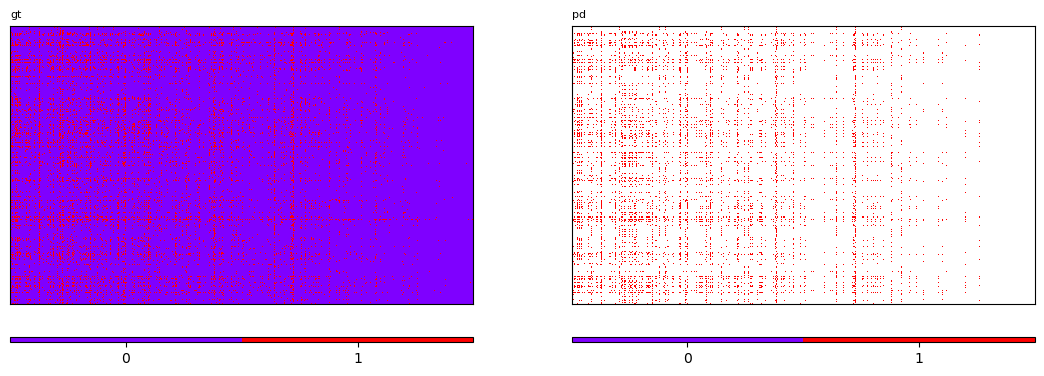

train  \
                                                                     0   
                 time iter         u         v             F    Recall   
0   17/07/24 09:32:10    0  0.100000  0.100000  36641.387924  0.906453   
1   17/07/24 09:32:10    1  1.000000  1.000000   5308.016810  0.000000   
2   17/07/24 09:32:11    2  0.207770  0.244405   4890.877134  0.667845   
3   17/07/24 09:32:11    3  0.532701  0.543871   4209.608596  0.237214   
4   17/07/24 09:32:11    4  0.275815  0.418648   3823.085752  0.501581   
5   17/07/24 09:32:12    5  0.314618  0.460687   3771.225061  0.431095   
6   17/07/24 09:32:12    6  0.313399  0.441935   3765.008789  0.448856   
7   17/07/24 09:32:13    7  0.318920  0.446875   3764.297936  0.438534   
8   17/07/24 09:32:13    8  0.319318  0.442502   3764.059889  0.446067   
9   17/07/24 09:32:14    9  0.320994  0.444434   3763.985875  0.440115   
10  17/07/24 09:32:14   10  0.321011  0.442921   3763.960880  0.440115   
11  17/07/24 09:32:14   11  0.321542  0.443635   3763.952605  0.438070   
12  17/07/24 09:32:15   12  0.321520  0.443110   3763.949798  0.438070   
13  17/07/24 09:32:15   13  0.321692  0.443367   3763.948851  0.437698   

                                  
                                  
   Precision  Accuracy        F1  
0   0.273137  0.820353  0.419783  
1   0.000000  0.928307  0.000000  
2   0.495584  0.927453  0.568961  
3   0.793962  0.940900  0.365290  
4   0.614281  0.941687  0.552240  
5   0.669845  0.943980  0.524583  
6   0.653888  0.943453  0.532311  
7   0.664225  0.943853  0.528285  
8   0.656584  0.943560  0.531229  
9   0.661680  0.943727  0.528620  
10  0.661680  0.943727  0.528620  
11  0.663615  0.943793  0.527754  
12  0.663615  0.943793  0.527754  
13  0.664174  0.943820  0.527661

<Figure size 640x480 with 0 Axes>

In [7]:
from models import BinaryMFThresholdExSigmoid

u, v = 0.1, 0.1

model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp_1.U, V=model_bmfp_1.V, W=W, u=u, v=v, init_method='custom', lamda=20)
model_bmfts_1.fit(X_train=X_train, task=task, verbose=False, display=False)

In [8]:
# # check pattern density

# from utils import binarize, matmul, show_matrix, to_sparse, multiply

# U = binarize(model_bmfts_1.U, model_bmfts_1.u)
# V = binarize(model_bmfts_1.V, model_bmfts_1.v)

# U, V = to_sparse(U), to_sparse(V)

# X = matmul(U, V.T, sparse=True, boolean=True)
# density = multiply(X, X_train).sum() / X.sum()
# show_matrix([(X, [0, 0], f"X density: {density}")])

# for i in range(k):
#     X = matmul(U[:, i], V[:, i].T, sparse=True, boolean=True)
#     density = multiply(X, X_train).sum() / X.sum()
#     show_matrix([(X, [0, 0], f"X_{i} density: {density}")])

# 2.1 Init U, V randomly

If `BinaryMFPenalty` is initialized with `init_method` == `normal` or `uniform`, then `reg` and `reg_growth` should not be set too large. It's hard to tweak comparing to `NMFSklearn` init.

d:\Dropbox\PyBMF\examples\..\models\BaseModel.py:53: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  self.init_model()


[I] k            : 10
[I] U            : None
[I] V            : None
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.1
[I] max_reg      : 10000000000.0
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[I] Normalized from: U: [0.0000, 0.2891], V: [0.0000, 0.3727]
[I] Normalized to  : U: [0.0000, 0.3095], V: [0.0000, 0.3095]


[I] error: 4.48e+03, rec_error: 4.48e+03, reg: 1.38e+04, reg_error: 6.27e+00: : 101it [00:07, 13.41it/s]                       


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-17_21-32-25_BinaryMFPenalty.pickle


c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


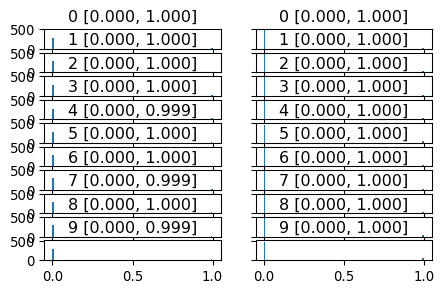

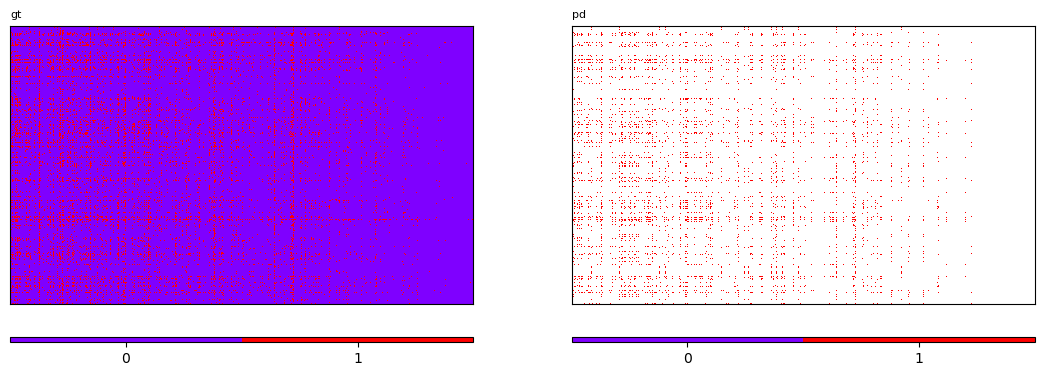

\
                                                                      
                  time iter        error    rec_error           reg   
0    17/07/24 09:32:16    0  5081.673872  5060.316401      1.000000   
1    17/07/24 09:32:16    1  3716.252935  3681.434950      1.000000   
2    17/07/24 09:32:16    2  3616.097498  3577.809826      1.100000   
3    17/07/24 09:32:16    3  3579.993826  3537.461098      1.210000   
4    17/07/24 09:32:17    4  3543.783485  3496.585553      1.331000   
5    17/07/24 09:32:17    5  3503.005953  3450.716201      1.464100   
6    17/07/24 09:32:17    6  3456.920076  3399.100298      1.610510   
7    17/07/24 09:32:17    7  3405.880540  3342.089829      1.771561   
8    17/07/24 09:32:17    8  3350.616499  3280.482962      1.948717   
9    17/07/24 09:32:17    9  3292.238849  3215.538938      2.143589   
10   17/07/24 09:32:17   10  3233.146360  3149.768833      2.357948   
11   17/07/24 09:32:17   11  3177.557742  3087.331276      2.593742   
12   17/07/24 09:32:17   12  3129.939389  3032.488435      2.853117   
13   17/07/24 09:32:17   13  3092.490782  2987.296130      3.138428   
14   17/07/24 09:32:17   14  3064.981096  2951.429243      3.452271   
15   17/07/24 09:32:17   15  3045.971884  2923.316743      3.797498   
16   17/07/24 09:32:17   16  3033.833721  2901.189474      4.177248   
17   17/07/24 09:32:18   17  3027.226885  2883.605600      4.594973   
18   17/07/24 09:32:18   18  3025.169865  2869.527962      5.054470   
19   17/07/24 09:32:18   19  3026.960476  2858.227025      5.559917   
20   17/07/24 09:32:18   20  3032.069694  2849.151507      6.115909   
21   17/07/24 09:32:18   21  3040.126618  2841.899065      6.727500   
22   17/07/24 09:32:18   22  3050.882817  2836.188911      7.400250   
23   17/07/24 09:32:18   23  3064.180250  2831.832639      8.140275   
24   17/07/24 09:32:18   24  3079.930347  2828.719399      8.954302   
25   17/07/24 09:32:18   25  3098.089855  2826.797352      9.849733   
26   17/07/24 09:32:18   26  3118.640685  2826.057368     10.834706   
27   17/07/24 09:32:18   27  3141.577497  2826.524560     11.918177   
28   17/07/24 09:32:18   28  3166.895851  2828.250973     13.109994   
29   17/07/24 09:32:18   29  3194.583176  2831.309809     14.420994   
30   17/07/24 09:32:19   30  3224.613215  2835.792688     15.863093   
31   17/07/24 09:32:19   31  3256.941781  2841.807171     17.449402   
32   17/07/24 09:32:19   32  3291.506508  2849.476825     19.194342   
33   17/07/24 09:32:19   33  3328.227158  2858.941064     21.113777   
34   17/07/24 09:32:19   34  3367.005831  2870.354199     23.225154   
35   17/07/24 09:32:19   35  3407.723134  2883.883286     25.547670   
36   17/07/24 09:32:19   36  3450.234113  2899.707279     28.102437   
37   17/07/24 09:32:19   37  3494.361531  2918.017841     30.912681   
38   17/07/24 09:32:19   38  3539.882890  2939.010311     34.003949   
39   17/07/24 09:32:19   39  3586.524691  2962.876304     37.404343   
40   17/07/24 09:32:19   40  3633.963820  2989.795674     41.144778   
41   17/07/24 09:32:19   41  3681.835689  3019.920548     45.259256   
42   17/07/24 09:32:19   42  3729.752400  3053.350172     49.785181   
43   17/07/24 09:32:19   43  3777.332467  3090.116217     54.763699   
44   17/07/24 09:32:19   44  3824.220304  3130.176813     60.240069   
45   17/07/24 09:32:20   45  3870.073386  3173.408478     66.264076   
46   17/07/24 09:32:20   46  3914.546897  3219.604428     72.890484   
47   17/07/24 09:32:20   47  3957.329281  3268.533283     80.179532   
48   17/07/24 09:32:20   48  3998.209565  3319.976023     88.197485   
49   17/07/24 09:32:20   49  4037.113584  3373.640362     97.017234   
50   17/07/24 09:32:20   50  4073.993975  3429.064064    106.718957   
51   17/07/24 09:32:20   51  4108.654771  3485.677394    117.390853   
52   17/07/24 09:32:20   52  4140.786995  3542.941411    129.129938   
53   17/07/24 09:32:20   53  4170.165610  3600.402498    142.042932   
54   17/07/24 09:32:20

train                              
                               0                              
                  time    Recall Precision  Accuracy        F1
0    17/07/24 09:32:16  0.000000  0.000000  0.928307  0.000000
1    17/07/24 09:32:16  0.021294  0.851301  0.929567  0.041549
2    17/07/24 09:32:16  0.027618  0.883929  0.930027  0.053562
3    17/07/24 09:32:16  0.034034  0.881928  0.930420  0.065539
4    17/07/24 09:32:17  0.041473  0.847909  0.930747  0.079078
5    17/07/24 09:32:17  0.048447  0.843042  0.931133  0.091629
6    17/07/24 09:32:17  0.056072  0.820408  0.931447  0.104970
7    17/07/24 09:32:17  0.067045  0.824943  0.932093  0.124011
8    17/07/24 09:32:17  0.080621  0.808015  0.932713  0.146614
9    17/07/24 09:32:17  0.092245  0.800000  0.933267  0.165416
10   17/07/24 09:32:17  0.105263  0.789951  0.933847  0.185772
11   17/07/24 09:32:17  0.124605  0.771445  0.934593  0.214554
12   17/07/24 09:32:17  0.138460  0.766735  0.935213  0.234562
13   17/07/24 09:32:17  0.155105  0.762689  0.935967  0.257785
14   17/07/24 09:32:17  0.164218  0.751489  0.936187  0.269536
15   17/07/24 09:32:17  0.176864  0.750888  0.936780  0.286295
16   17/07/24 09:32:18  0.194718  0.741501  0.937400  0.308440
17   17/07/24 09:32:18  0.204668  0.736860  0.937740  0.320355
18   17/07/24 09:32:18  0.208853  0.736152  0.937913  0.325389
19   17/07/24 09:32:18  0.219825  0.730306  0.938247  0.337932
20   17/07/24 09:32:18  0.221127  0.731242  0.938333  0.339569
21   17/07/24 09:32:18  0.221499  0.732923  0.938400  0.340189
22   17/07/24 09:32:18  0.221220  0.736077  0.938480  0.340197
23   17/07/24 09:32:18  0.231356  0.738279  0.939013  0.352308
24   17/07/24 09:32:18  0.237493  0.734964  0.939193  0.358985
25   17/07/24 09:32:18  0.246048  0.733981  0.939553  0.368549
26   17/07/24 09:32:18  0.247815  0.733352  0.939613  0.370448
27   17/07/24 09:32:18  0.250325  0.733715  0.939740  0.373293
28   17/07/24 09:32:18  0.254324  0.727394  0.939707  0.376877
29   17/07/24 09:32:18  0.257951  0.725039  0.939787  0.380521
30   17/07/24 09:32:19  0.265669  0.724024  0.940093  0.388707
31   17/07/24 09:32:19  0.266970  0.724634  0.940173  0.390188
32   17/07/24 09:32:19  0.272550  0.722990  0.940360  0.395867
33   17/07/24 09:32:19  0.273108  0.722154  0.940353  0.396330
34   17/07/24 09:32:19  0.274224  0.720851  0.940353  0.397305
35   17/07/24 09:32:19  0.275618  0.719942  0.940380  0.398628
36   17/07/24 09:32:19  0.277478  0.718517  0.940407  0.400349
37   17/07/24 09:32:19  0.282221  0.715464  0.940493  0.404775
38   17/07/24 09:32:19  0.281849  0.714016  0.940420  0.404160
39   17/07/24 09:32:19  0.284452  0.712224  0.940460  0.406539
40   17/07/24 09:32:19  0.285103  0.712195  0.940487  0.407198
41   17/07/24 09:32:19  0.287893  0.710907  0.940553  0.409822
42   17/07/24 09:32:19  0.290497  0.710970  0.940667  0.412464
43   17/07/24 09:32:19  0.290497  0.710970  0.940667  0.412464
44   17/07/24 09:32:20  0.290497  0.710970  0.940667  0.412464
45   17/07/24 09:32:20  0.290497  0.710970  0.940667  0.412464
46   17/07/24 09:32:20  0.291240  0.710204  0.940667  0.413084
47   17/07/24 09:32:20  0.295611  0.707860  0.940753  0.417055
48   17/07/24 09:32:20  0.296076  0.708500  0.940800  0.417629
49   17/07/24 09:32:20  0.297936  0.708693  0.940887  0.419509
50   17/07/24 09:32:20  0.297936  0.708693  0.940887  0.419509
51   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
52   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
53   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
54   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
55   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
56   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
57   17/07/24 09:32:20  0.300074  0.708763  0.940980  0.421637
58   17/07/24 09:32:21  0.300074  0.708763  0.940980  0.421637
59   17/07/24 09:32:21  0.300074  0.708763  0.940980  0.421637
60   17/07/24 09:32:21  0.300074  0.708763  0.940980  0.42

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\IPython\core\events.py:82: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


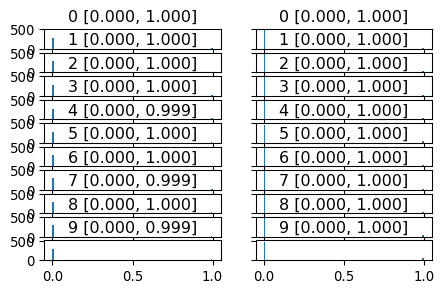

In [9]:
init_method = 'normal'
# init_method = 'uniform'

reg = 1
reg_growth = 1.1

model_bmfp_2 = BinaryMFPenalty(k=k, U=None, V=None, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=100, seed=2024)
model_bmfp_2.fit(X_train=X_train, task=task, verbose=False, display=True)

show_factor_distribution(U=model_bmfp_2.U, V=model_bmfp_2.V, resolution=100)

# 2.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 10
[I] U            : (300, 10)
[I] V            : (500, 10)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1721223154
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized from: U: [0.0000, 1.0000], V: [0.0000, 1.0000]
[I] Normalized to  : U: [0.0000, 1.0000], V: [0.0000, 1.0000]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.341, -0.161]
[I] iter: 2, start: [0.020, 0.062], direction: [6570.683, -12.470]
[I] iter: 3, start: [0.023, 0.062], direction: [-2602.484, -47.941]
[I] iter: 4, start: [0.021, 0.062], direction: [3625.354, -26.761]
[I] iter: 5, start: [0.022, 0.062], direction: [-1459.071, -46.121]
[I] iter: 6, start: [0.022, 0.062], direction: [131.535, -41.283]
[I] iter

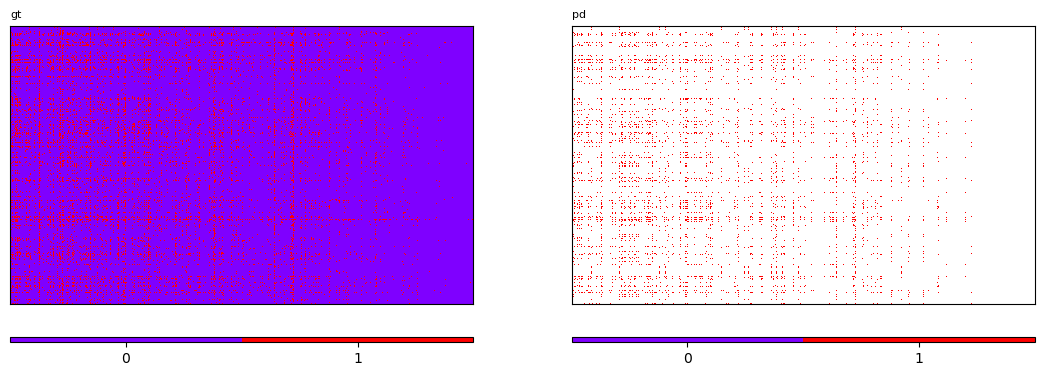

train  \
                                                                   0   
                time iter         u         v            F    Recall   
0  17/07/24 09:32:35    0  0.100000  0.100000  4370.615401  0.300074   
1  17/07/24 09:32:35    1  0.019964  0.062332  4115.072617  0.300074   
2  17/07/24 09:32:35    2  0.023097  0.062326  4084.608468  0.300074   
3  17/07/24 09:32:36    3  0.020615  0.062280  4082.167533  0.300074   
4  17/07/24 09:32:37    4  0.022344  0.062267  4068.942190  0.300074   
5  17/07/24 09:32:37    5  0.021648  0.062245  4063.988181  0.300074   
6  17/07/24 09:32:38    6  0.021711  0.062226  4063.950048  0.300074   
7  17/07/24 09:32:38    7  0.021677  0.062186  4063.936405  0.300074   
8  17/07/24 09:32:39    8  0.021729  0.062146  4063.926765  0.300074   
9  17/07/24 09:32:39    9  0.021651  0.062105  4063.925947  0.300074   

                                
                                
  Precision Accuracy        F1  
0  0.708763  0.94098  0.421637  
1  0.708763  0.94098  0.421637  
2  0.708763  0.94098  0.421637  
3  0.708763  0.94098  0.421637  
4  0.708763  0.94098  0.421637  
5  0.708763  0.94098  0.421637  
6  0.708763  0.94098  0.421637  
7  0.708763  0.94098  0.421637  
8  0.708763  0.94098  0.421637  
9  0.708763  0.94098  0.421637

<Figure size 640x480 with 0 Axes>

In [10]:
model_bmfts_2 = BinaryMFThresholdExSigmoid(k=k, U=model_bmfp_2.U, V=model_bmfp_2.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_2.fit(X_train=X_train, task=task, verbose=False, display=False)